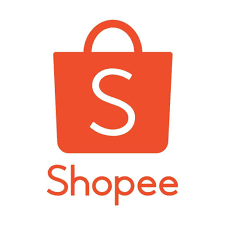</a>

<h1 align="center"><font size="5">Project: Comments analysis - Predict "sentiment" of comments from shopee book comments</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-04-20 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: MDS5_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname: Pham Le Phu
- Date of birth: 21/12/1991
- Place of birth: Ben Tre
- Email: plephu@gmail.com
- Mobile phone: 0398416044

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Logistic Regression Algorithm** to predict: **"sentiment of comments from shopee books comments"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: shopee_book_comment.csv

#### Data dictionary:
1. user_comment: comment of user
2. user_rating: sactify of user (rating from 1 to 5, 5 is the best, 1 is worst)
    * If rating greater than 4 --> user like product
    * If rating lower than 2 --> user not like product

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Logistic Regression
    - Model Evaluation using Test set
    - Report

### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
from underthesea import sent_tokenize
import string
from processor.text import TextProcessor
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read and overview dataset

In [3]:
data = pd.read_csv('./input_data/shoppee_book_comments.csv')
data.head()

,page_id,pro_idx,item_id,shop_id,product_name,category_name,number_rating,page_no,user_id,user_name,comment_id,created_time,user_rating,user_comment,user_tag_content
0,68,4099,7533954553,91303830,Sách Ehon - Combo 4 cuốn Bé thích ăn món nào n...,Children's Books,70.0,0.0,507517476.0,vumaihuong2020,5761481675,1.629633e+09,5.0,Bé nhà mình rất thích và cũng rất hợp tác với ...,|
1,40,2418,1270721073,55485833,Sách - Thơ Từ Những Hạt Mầm (trọn bộ 5 cuốn),Comics & Manga,68.0,3.0,27904753.0,s*****9,5695767420,1.629092e+09,5.0,Sách đóng gói cẩn thận . Rất xinh đáng mua cho...,|
2,63,3792,4341233746,272432350,[Mã LIFEMC2010 giảm 10% đơn 150k] Sách - Tiếng...,Language Learning & Dictionaries,65.0,1.0,77586247.0,_*****_,6029765403,1.631949e+09,5.0,"Nội dung sách hay, triển khai kiến thức rõ ràn...",|
3,58,3481,3414234213,162534564,Sách - Vòng quanh thế giới - bộ 30 quyển,Comics & Manga,82.0,1.0,42853902.0,lyngocdinh,5093646849,1.623765e+09,5.0,Giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...,|
4,61,3691,2854091277,46725128,Sách - Kỹ Năng Đi Trước Đam Mê (Tái Bản),Business & Investment,136.0,5.0,35438981.0,nhiyoyo,5136979761,1.624160e+09,5.0,"Ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...",|


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           2000 non-null   int64  
 1   pro_idx           2000 non-null   int64  
 2   item_id           2000 non-null   int64  
 3   shop_id           2000 non-null   int64  
 4   product_name      2000 non-null   object 
 5   category_name     2000 non-null   object 
 6   number_rating     2000 non-null   float64
 7   page_no           2000 non-null   float64
 8   user_id           2000 non-null   float64
 9   user_name         2000 non-null   object 
 10  comment_id        2000 non-null   int64  
 11  created_time      2000 non-null   float64
 12  user_rating       2000 non-null   float64
 13  user_comment      1799 non-null   object 
 14  user_tag_content  2000 non-null   object 
dtypes: float64(5), int64(5), object(5)
memory usage: 234.5+ KB


In [5]:
data = data[['user_comment','user_rating']]

In [6]:
data.shape

(2000, 2)

### Pre-processing data

#### Check duplicate and remove

In [7]:
data.duplicated().sum()

246

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1754, 2)

#### Check missing values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_comment  1752 non-null   object 
 1   user_rating   1754 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.1+ KB


In [11]:
data.isnull().sum()

user_comment    2
user_rating     0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.head()

,user_comment,user_rating
0,Bé nhà mình rất thích và cũng rất hợp tác với ...,5.0
1,Sách đóng gói cẩn thận . Rất xinh đáng mua cho...,5.0
2,"Nội dung sách hay, triển khai kiến thức rõ ràn...",5.0
3,Giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...,5.0
4,"Ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...",5.0


#### Convert to lower case

In [14]:
data.user_comment = data.user_comment.str.lower()

#### Remove `'` 

In [15]:
data.user_comment = data.user_comment.str.replace('’','')

#### Convert multiple dot to 1 dot

In [16]:
data.user_comment = data.user_comment.apply(lambda x: regex.sub(r'\.+','.',x))

#### Cleaning data

In [17]:
text_processor = TextProcessor()

In [18]:
data.user_comment = data.user_comment.apply(lambda x: text_processor.process_text(x))

#### Convert to unicode

In [19]:
data.user_comment = data.user_comment.apply(lambda x: text_processor.covert_unicode(x))

#### Process post_tagging

In [20]:
data.user_comment = data.user_comment.apply(lambda x: text_processor.process_postag_thesea(x))

### Feature Engineering

In [21]:
data.user_rating.value_counts()

5.0    974
1.0    778
Name: user_rating, dtype: int64

In [22]:
# tỷ lệ like:notlike - 1.25:1

In [23]:
# Cột user_rating chỉ có 2 loại dữ liệu 1.0 (cho not like comment) và 5.0 (like comment)
# => thêm cột label với 0: not like comment và 1: like comment

In [24]:
data['label'] = data.user_rating.apply(lambda x: 1 if x > 3 else 0)

In [25]:
data.head()

,user_comment,user_rating,label
0,rất thích cũng rất hợp_tác cảm_ơn shop rất nhiều,5.0,1
1,rất xinh đáng mua trẻ nghe,5.0,1
2,kiến_thức dễ hiểu tuy_nhiên giao khá lâu vẫn c...,5.0,1
3,giao lâu bị cong gãy,5.0,1
4,đẹp lắm giao đúng tot mua,5.0,1


In [26]:
data.tail()

,user_comment,user_rating,label
1993,mua săn ko kiểm_soát chưa giao đã giao đã báo ...,1.0,0
1995,đóng sản_phẩm không_có bảo bị móp rất xấumong_...,1.0,0
1996,cũ bị bung hết cũng là mua,1.0,0
1997,giao toàn đã qua mưa sale chẳng đổi trả làm tố...,1.0,0
1998,mỏng mở thấy luôn,1.0,0


In [27]:
data_sub_like = data[data.label==1]
data_sub_like.shape

(974, 3)

In [28]:
data_sub_not_like = data[data.label==0]
data_sub_not_like.shape

(778, 3)

### Visualize

In [29]:
# Like 
wc_like = WordCloud(background_color='black',
                   max_words=500
                   )
# generate the word cloud
wc_like.generate(str(data_sub_like['user_comment'].values))

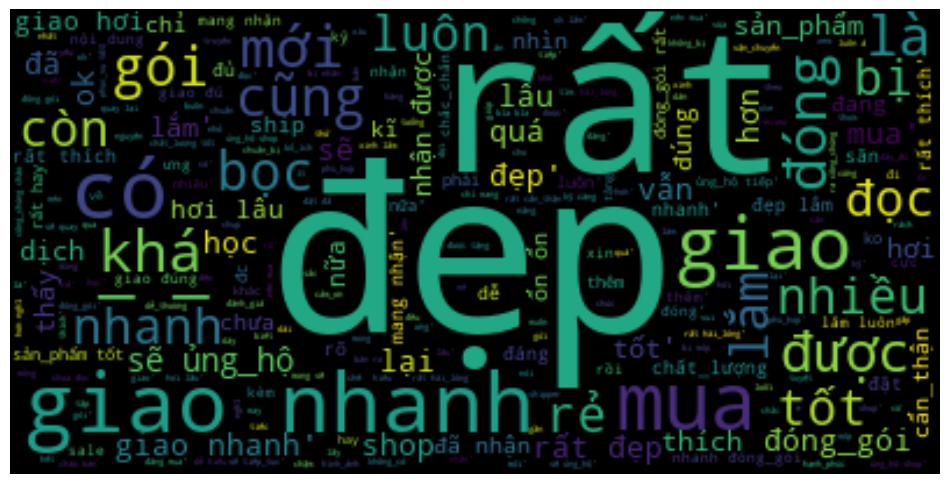

In [30]:
# display the word clouds 
plt.figure(figsize=(12, 12)) 
plt.imshow(wc_like,interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
# Not Like 
wc_notlike = WordCloud(background_color='black',
                   max_words=500
                   )
# generate the word cloud
wc_notlike.generate(str(data_sub_not_like['user_comment'].values))

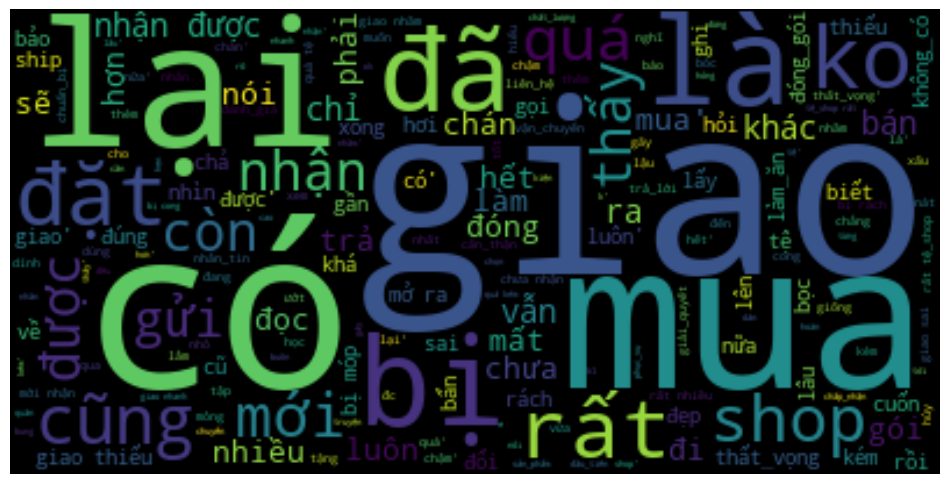

In [32]:
# display the word clouds 
plt.figure(figsize=(12, 12)) 
plt.imshow(wc_notlike,interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# Còn từ "tốt", khả năng vẫn còn lẫn mẫu "Like" là "not like", thử kiểm tra

In [34]:
data_sub_notlike_with_Like =data_sub_not_like[data['user_comment'].str.contains("tốt")]

In [35]:
data_sub_notlike_with_Like.shape

(19, 3)

In [60]:
data_sub_notlike_with_Like.head()

,user_comment,user_rating,label
1001,chưa bao_giờ đặt mới nhận được đều là làm_việc...,1.0,0
1004,viết nói d3 tốt là thấy đúng nhiều sai_sót rời...,1.0,0
1014,giao nhanh đóng tốt đẹp nhiều sai nhiều sai sa...,1.0,0
1036,mua sale mừng về khui ra may được cuốn double ...,1.0,0
1047,cốt_truyện sai_lệch hiểu in chả hiểu tốt nhất k,1.0,0


### Build Model

#### Split into input/output

In [37]:
X=data['user_comment']
y=data['label']

In [38]:
X.head()

0     rất thích cũng rất hợp_tác cảm_ơn shop rất nhiều
1                           rất xinh đáng mua trẻ nghe
2    kiến_thức dễ hiểu tuy_nhiên giao khá lâu vẫn c...
3                                 giao lâu bị cong gãy
4                            đẹp lắm giao đúng tot mua
Name: user_comment, dtype: object

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

#### Split into train/test 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [41]:
X_train.head()

669                  giao tốt sẽ còn mua nhiều
500                                       đóng
430                                           
791    mới đẹp không_phải chống cũng không_mỏi
606            đẹp lắm bọc bị quăn dập ưnggggg
Name: user_comment, dtype: object

#### Init pipeline for transform and training

In [42]:
_input = [('vectorizer', TfidfVectorizer()),
         ('model', LogisticRegression())]

In [43]:
model_auto = Pipeline(_input)
model_auto

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [44]:
model_auto.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [45]:
model_auto.score(X_train, y_train)

0.9486133768352365

In [46]:
model_auto.score(X_test, y_test)

0.8726235741444867

In [47]:
y_testhat = model_auto.predict(X_test)

In [48]:
log_reg_accuracy = accuracy_score(y_testhat, y_test)  
log_reg_accuracy

0.8726235741444867

### Evaluate result

In [49]:
# Xem kết quả thống kê
conf_mat = confusion_matrix(y_test, y_testhat)
print(conf_mat) 

[[207  38]
 [ 29 252]]


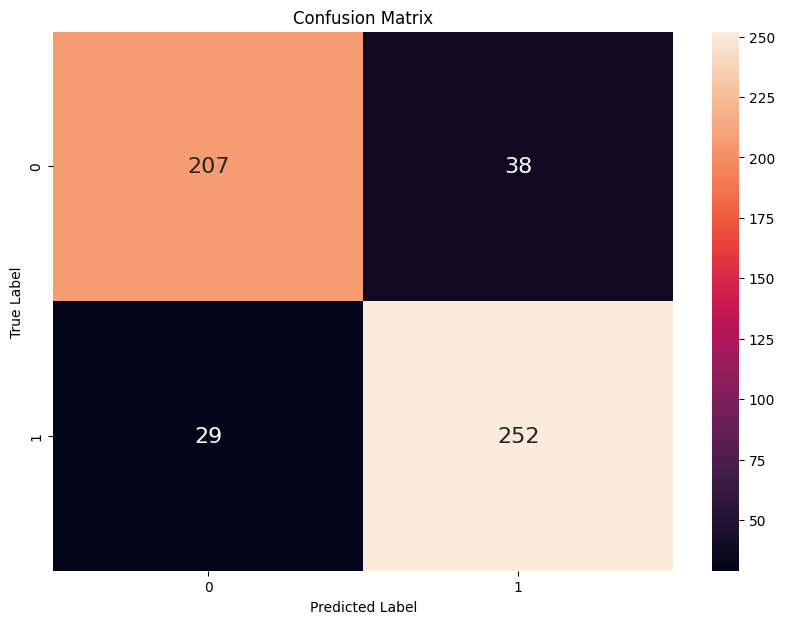

In [50]:
fig = plt.figure(figsize=(10, 7))  
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
plt.title("Confusion Matrix")  
plt.xlabel("Predicted Label")  
plt.ylabel("True Label")  
plt.show()  

## Nhận xét
* Class 0:
    * Mô hình dự đoán đúng 207 trường hợp not like, sai 38 trường hợp (actual:not_like nhưng predicted thành like)
* Class 1:
    * Mô hình dự đoán đúng 252 trường hợp like, sai 29 trường hợp (actual: like nhưng predicted thành not_like)

In [51]:
print(classification_report (y_test, y_testhat))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       245
           1       0.87      0.90      0.88       281

    accuracy                           0.87       526
   macro avg       0.87      0.87      0.87       526
weighted avg       0.87      0.87      0.87       526



## Nhận xét
* Precision cho cả 2 class rất là gần bằng nhau, nhưng có sự khác biệt nhẹ recall của 2 class
* Recall của class 0 cho thấy mô hình không phát hiện tốt lắm nhưng cũng đáng tin cậy
* Lý do: có thể trong comment có chữ "tốt" (nhưng thực sự là đánh giá "không tốt") => Làm mô hình dự đoán sai. Có 19 trường hợp có đánh giá 1.0 (nhưng có chữ "tốt" trong comment)
* f-1 score chênh lệch không đáng kể.

In [52]:
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_testhat)

In [53]:
fpr

array([0.        , 0.15510204, 1.        ])

In [54]:
tpr

array([0.        , 0.89679715, 1.        ])

In [55]:
# calculate AUC
auc = metrics.roc_auc_score (y_test, y_testhat) 
print('AUC: %.3f' % auc)

AUC: 0.871


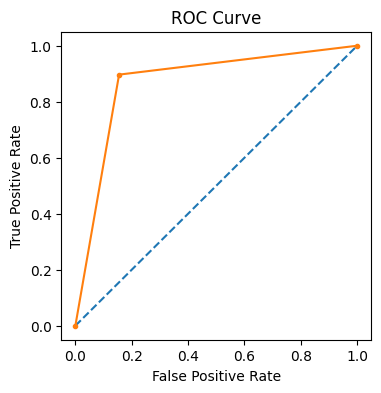

In [56]:
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle= '--') 
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.show()

In [61]:
# Thử predict cho data_sub_notlike_with_Like
y_notlike_with_Like = data_sub_notlike_with_Like['user_comment']
y_testhat_notlike_with_Like = model_auto.predict(y_notlike_with_Like)
y_testhat_notlike_with_Like

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

#### => ta thấy có 5 trường hợp dự đoán sai (trên 19 cases.)

## Nhận xét:
* accuracy_score cao ở mức 87%, ROC và AUC cho thấy model khá là thành công. Nhưng cần lưu ý về recall rate của 2 class có 1 chút khác biệt nhỏ. 
* Cần có cách xử lý cho trường hợp trong comment có chữ "tốt" (nhưng thực sự là đánh giá "không tốt") để mô hình dự đoán tốt hơn.